### Problem Statement

 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not

Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Load Original Data File

In [2]:
df=pd.read_csv('Titanic.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


So We can see that there are 891 Rows or 891 Passenger Data and 12 Columns or 12 Attributes

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Here we can see that "PassengerId,Survived,Pclass,Age,Sibsp,Parch,Fare" have Numerical value and "Name,Sex,Ticket,Cabin,Embarked" have object value.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


So we oberved that No Columns have Null Values.

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Observation:
    The Mean is more than Median(50th percentile) in all columns.
    The difference between 75th and max suggest that column      Age,Sibsp,Parch,Fare have outliers.

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We Can observe that Age, Cabin and Embarket have Null Values.So we have to treat the null values

In [9]:
df['Age'].isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [10]:
df['Cabin'].isnull().value_counts()

True     687
False    204
Name: Cabin, dtype: int64

The Column 'Cabin' more than more than 70% Null Values or missing values.So dropping the column doesn't have any effect in Dataset 

In [11]:
# Dropping cabin column
df.drop('Cabin',axis=1,inplace=True)

In [12]:
#Imputing Age column using Mean values of Age Column

df['Age'].fillna(df['Age'].mean(),inplace=True)

In [13]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
#imputing missing value in 'Embarked'
#fill the null values with Median value whih is S
df['Embarked'].fillna('S',inplace=True)

In [15]:
df.Survived.unique()

array([0, 1], dtype=int64)

In [16]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [17]:
df.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [18]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [19]:
df.Sex.unique()

array(['male', 'female'], dtype=object)

In [20]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [21]:
df.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [22]:
df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [23]:
df.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [24]:
df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

# Data Visualization

In [25]:
#Importing Necessary Libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# sns.heatmap(df.isnull())
plt.show()

We can saw that We Have benn successfully treated all the Null Values present in the Dataset

### Cheak Correlation

In [27]:
df_corr=df.corr()
df_corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


<AxesSubplot:>

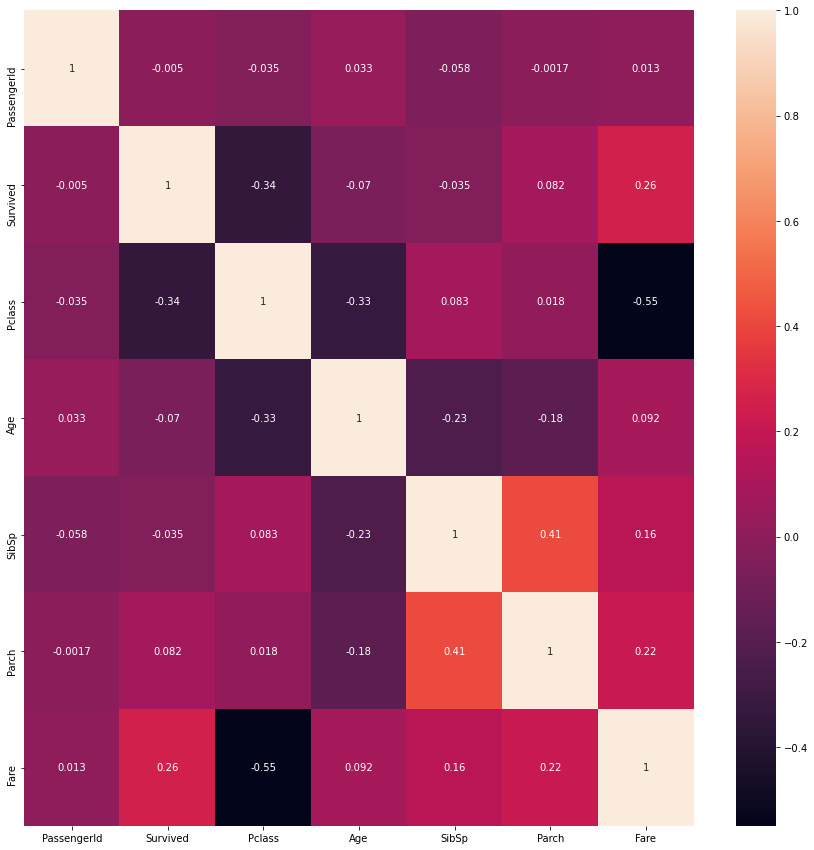

In [28]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

In [29]:
df_corr['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.069809
Pclass        -0.338481
Name: Survived, dtype: float64

So we can see that fare and Parch have positive correlation and all the other columns have negative correlation with Target column

### Univariate Analysis

<AxesSubplot:xlabel='Survived', ylabel='count'>

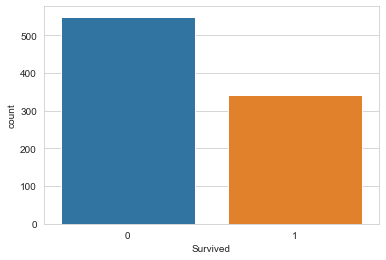

In [30]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

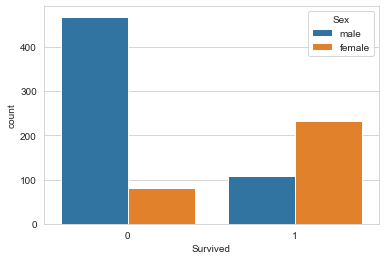

In [31]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df)

So We Can see that Females survived more than Male

<AxesSubplot:xlabel='Survived', ylabel='count'>

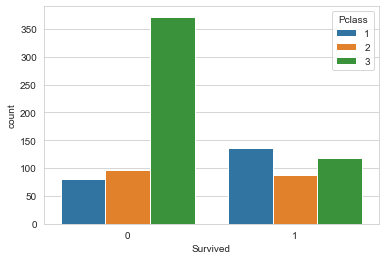

In [32]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df)

Number of Dead people is highest in Class 3 in Pclass

<AxesSubplot:xlabel='Survived', ylabel='count'>

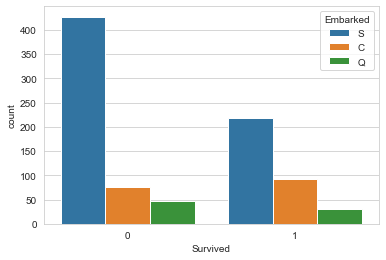

In [33]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Embarked',data=df)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

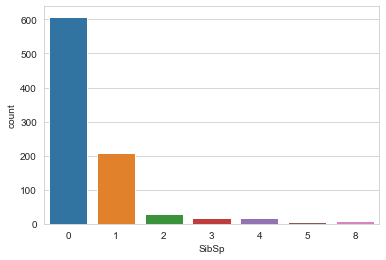

In [34]:
sns.countplot(df['SibSp'])

So we can say that most of the people are not siblings of each other

<AxesSubplot:>

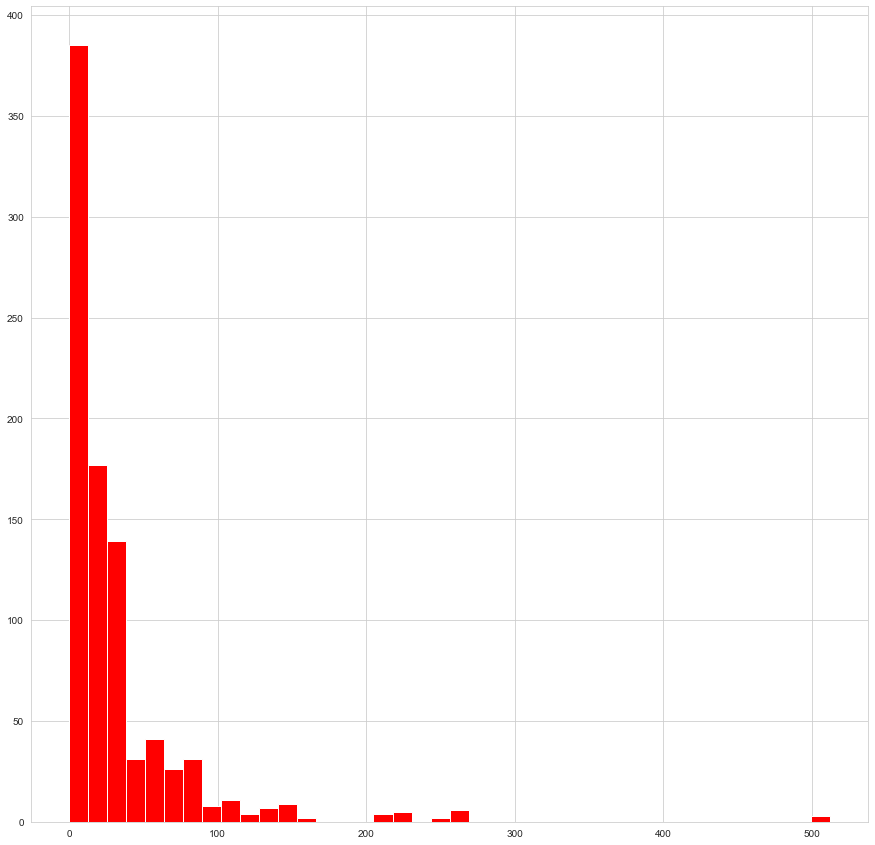

In [35]:
df['Fare'].hist(bins=40,color='r',figsize=(15,15))

<AxesSubplot:>

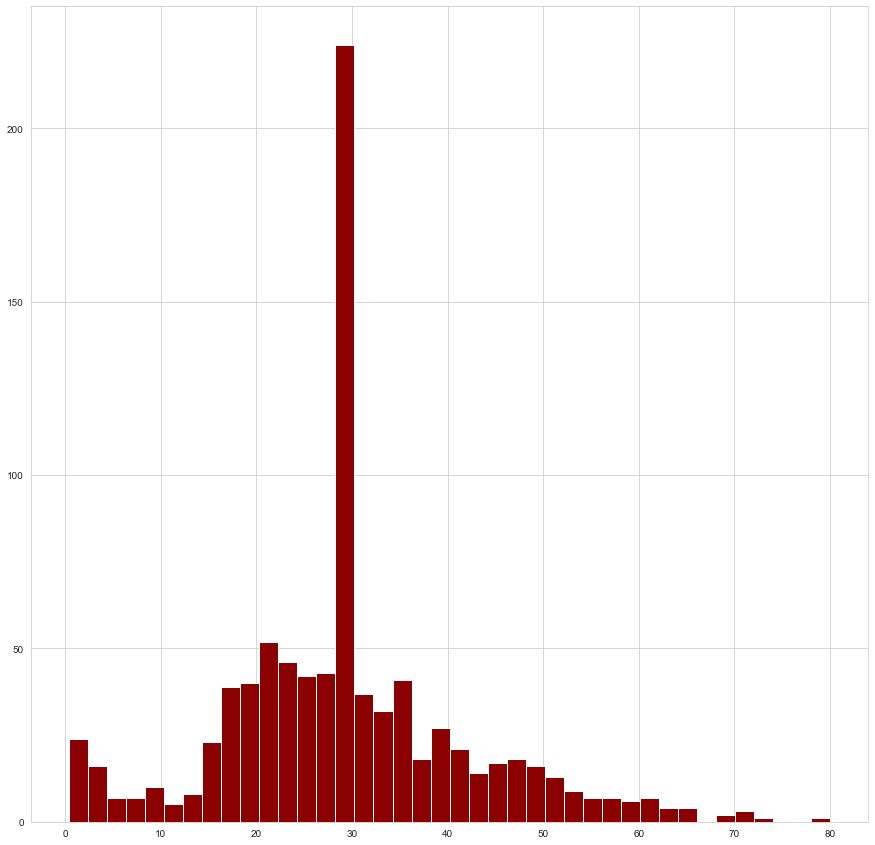

In [36]:
df['Age'].hist(bins=40,color='darkred',figsize=(15,15))

Most os the People are Around 30 Years of Age

<AxesSubplot:xlabel='Age'>

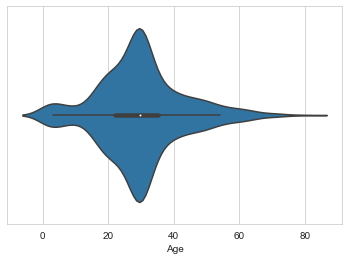

In [37]:
sns.violinplot(x='Age',data=df,figsize=(15,15))

### Bivariate Analysis

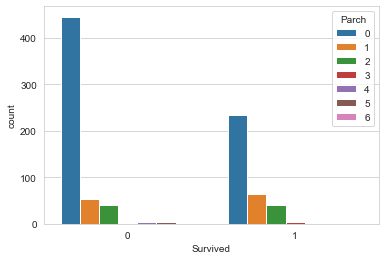

In [38]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Parch',data=df,)
plt.show()

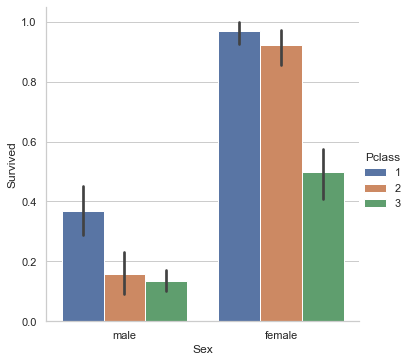

In [39]:
sns.set(style='whitegrid') 
sns.catplot(x='Sex',y='Survived',hue='Pclass',data=df,kind='bar')

We see that in Pclass 1,2,3 Females are more than malem

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

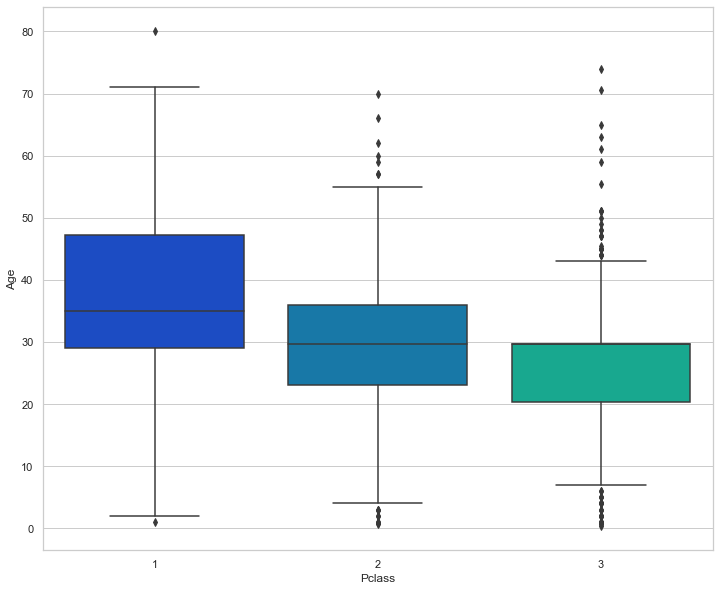

In [40]:
plt.figure(figsize=(12,10))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

We Observe that in in Class 1 are most Aged People.

And Class 3 have all junior people

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

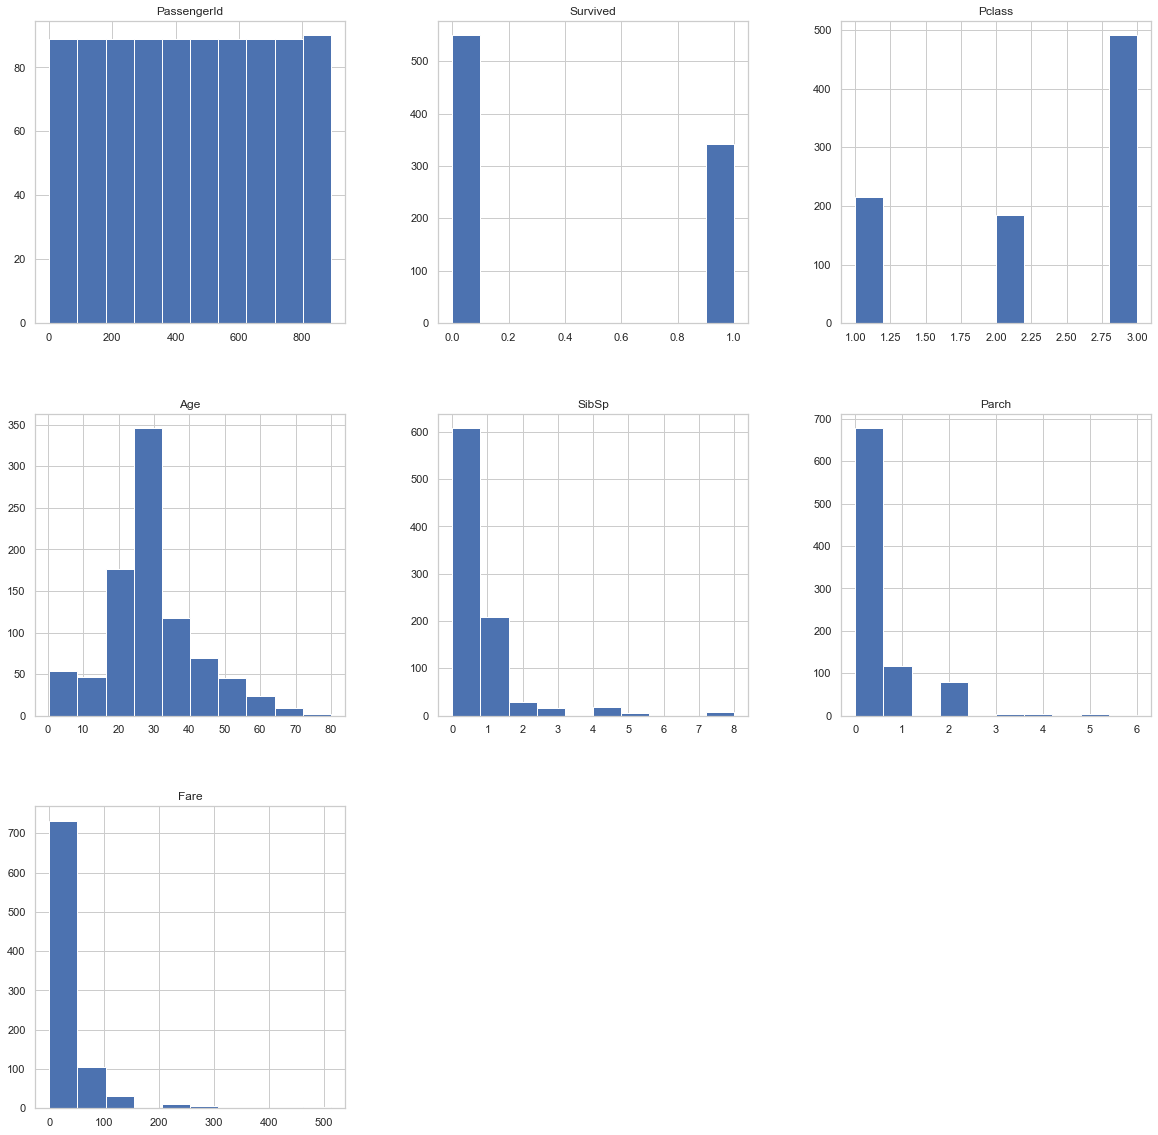

In [41]:
df.hist(figsize=(20,20))

In [42]:
#Drop the columns which is not required for Model Buidling
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

These 3 columns have passengers personal data which doeen't reqire to calculate survival data.
So we drop those columns.

In [43]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


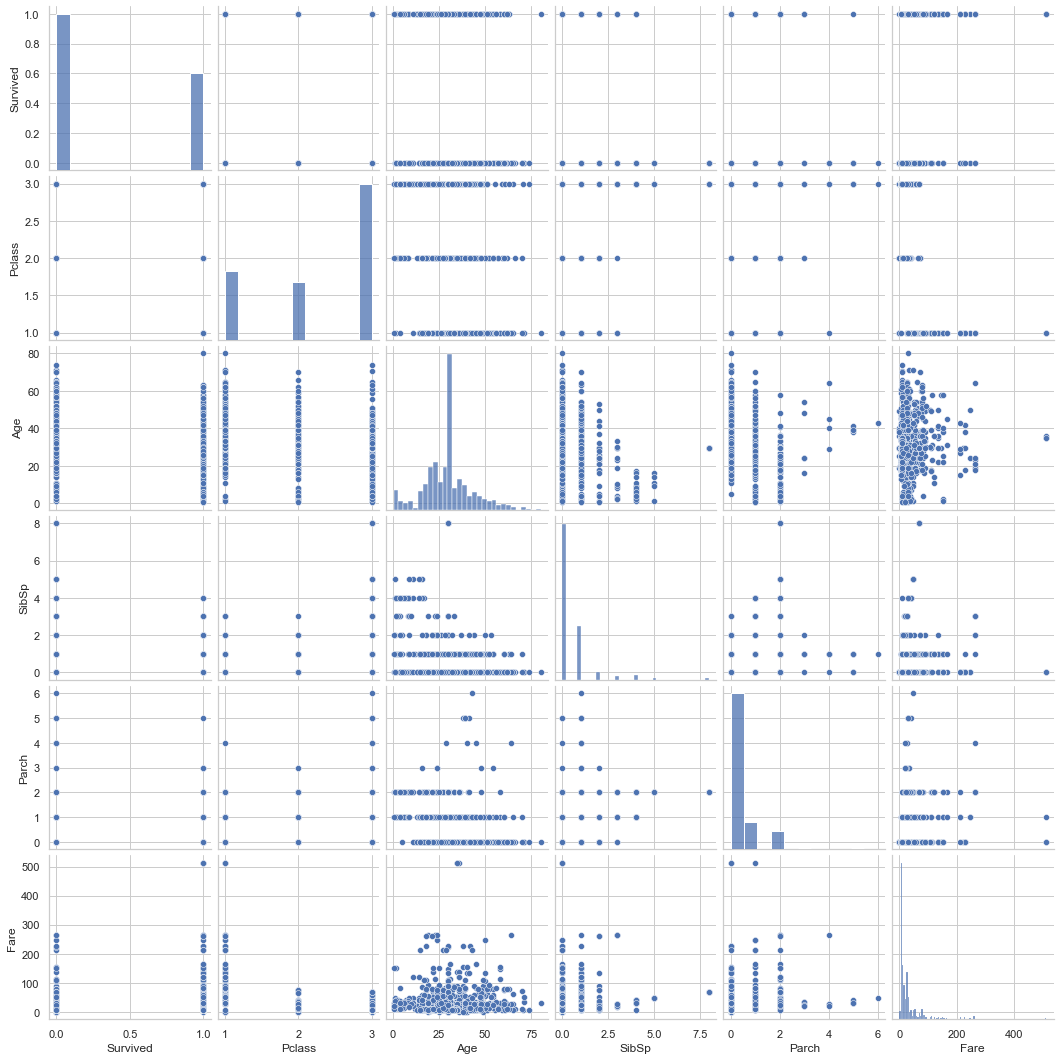

In [44]:
# Checking the Pairplot of Dataset
sns.pairplot(df)

### Checking Distribution 

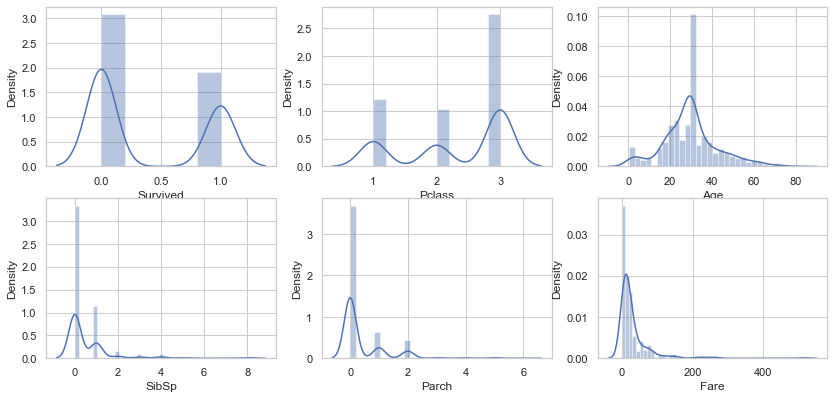

In [45]:
#Data Distribution
di=df.select_dtypes(exclude='object')
plt.figure(figsize=(14,10))
plot=1
for col in di:
    if plot<=13:
        plt.subplot(3,3,plot)
        sns.distplot(di[col])
        plt.xlabel(col)
        plot=plot+1
plt.show()

Here Survived,Pclass,Sibsp,Parch are encoded labels so we don't need to perform any operation.

Age and Fare are normally distributed. And all others are not normally distributed.

### Checking Outliers

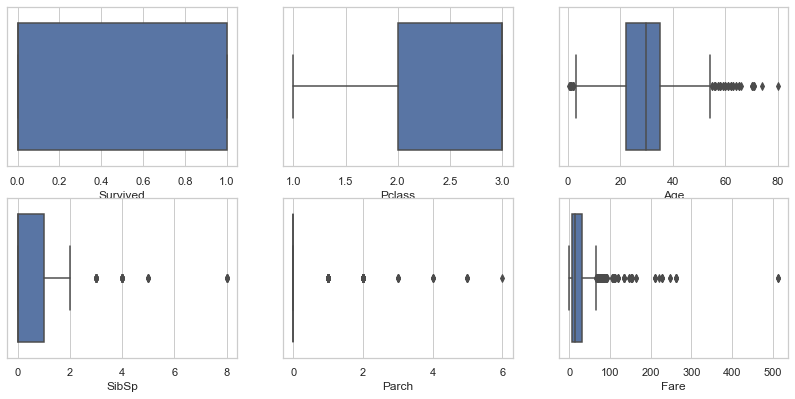

In [46]:
plt.figure(figsize=(14,10))
plot=1
for col in di:
    if plot<=13:
        plt.subplot(3,3,plot)
        sns.boxplot(di[col])
        plt.xlabel(col)
        plot=plot+1
plt.show()

Parch,Sibsp are categorial data so dnt need any action there.

In Age and Fare outliers are very close to whiskers.

In [47]:
## If our data in Skewed in Nature
def replace_outlier(df,col):
    IQR=df[col].quantile(.75)-df[col].quantile(.25)
    lower_limit=df[col].quantile(.25)-(1.5*IQR)
    upper_limit=df[col].quantile(.75)+(1.5*IQR)
    non_outlier=np.where((df[col]<lower_limit )|(df[col]>upper_limit),df[col].median(),df[col])
    df[col]=non_outlier
    plt.subplot(1,2,1)
    sns.distplot(df[col])
    plt.subplot(1,2,2)
    sns.boxplot(df[col])

In [48]:
## For normally Distributed Data.
# if our data is normally distributed 
def outlier_normally(df,col):
    Lower_boundary=df[col].mean()*-3*df[col].std()
    upper_boundary=df[col].mean()* +3*df[col].std()
    non_outlier=np.where((df[col]<Lower_boundary)|(df[col]>upper_boundary),df[col].median(),df[col])
    df[col]=non_outlier
    plt.subplot(1,2,1)
    sns.distplot(df[col])
    plt.subplot(1,2,2)
    sns.boxplot(df[col])

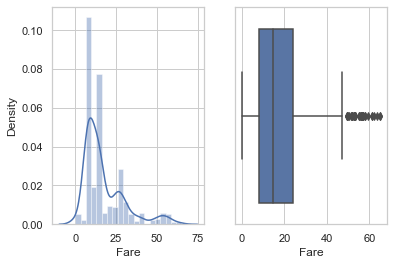

In [49]:
## Outliers are Treated Sucessfully.
replace_outlier(df,'Fare')

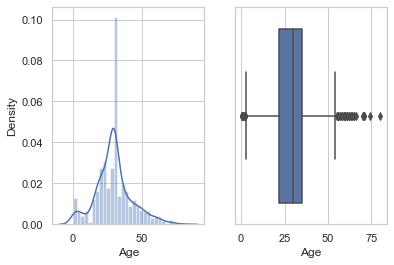

In [50]:
## We have sucessfully treated the outliers present in Age columns.
outlier_normally(df,'Age')

In [51]:
df.shape

(891, 8)

As we can see that we didn't lost very much data

### Checking Skewness

In [52]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        1.616669
dtype: float64

In [53]:
df_new=df.copy()

In [54]:
df_new['Fare']=np.cbrt(df_new['Fare'])
df_new['Parch']=np.sqrt(df_new['Parch'])
df_new['SibSp']=np.cbrt(df_new['SibSp'])

Skewness Removed

In [55]:
df_new.skew()

Survived    0.478523
Pclass     -0.630548
Age         0.434488
SibSp       1.033059
Parch       1.529799
Fare       -0.310377
dtype: float64

# Data Preprocessing

In [56]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_new['Sex']=le.fit_transform(df_new['Sex'])
df_new['Embarked']=le.fit_transform(df_new['Embarked'])

In [57]:
df_new.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1.00000,0.000000,1.935438,2
1,1,1,0,38.000000,1.00000,0.000000,2.435929,0
2,1,3,0,26.000000,0.00000,0.000000,1.993730,2
3,1,1,0,35.000000,1.00000,0.000000,3.758647,2
4,0,3,1,35.000000,0.00000,0.000000,2.004158,2
5,0,3,1,29.699118,0.00000,0.000000,2.037485,1
6,0,1,1,54.000000,0.00000,0.000000,3.729218,2
7,0,3,1,2.000000,1.44225,1.000000,2.762205,2
8,1,3,0,27.000000,0.00000,1.414214,2.232928,2
9,1,2,0,14.000000,1.00000,0.000000,3.109675,0


### Separating Input and Output Variable

In [58]:
df_x=df_new.drop(["Survived"],axis=1)
y=df_new[['Survived']]

In [59]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
df_x=pd.DataFrame(x,columns=df_x.columns)
x

array([[ 0.82737724,  0.73769513, -0.5924806 , ..., -0.53974741,
        -0.82837029,  0.58595414],
       [-1.56610693, -1.35557354,  0.63878901, ..., -0.53974741,
        -0.01818269, -1.9423032 ],
       [ 0.82737724, -1.35557354, -0.2846632 , ..., -0.53974741,
        -0.73400797,  0.58595414],
       ...,
       [ 0.82737724, -1.35557354,  0.        , ...,  2.06180484,
         0.67201068,  0.58595414],
       [-1.56610693,  0.73769513, -0.2846632 , ..., -0.53974741,
         1.06851313, -1.9423032 ],
       [ 0.82737724,  0.73769513,  0.17706291, ..., -0.53974741,
        -0.75794101, -0.67817453]])

### Importing Necessery Modules

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve,auc

### Lets Find the best Random state no for Maximum accuracy

In [61]:
maxAccu=0
maxRS=0


for i in range (1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    lr=LogisticRegression()
    
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        
print('Best accuracu is',maxAccu,'on Random State',maxRS)

Best accuracu is 0.8475336322869955 on Random State 6


### Divide the data into Train and Test

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=6,stratify=y)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(668, 7) (223, 7) (668, 1) (223, 1)


In [63]:
lr=LogisticRegression()
gnb=GaussianNB()
knn=KNeighborsClassifier()
rfc=RandomForestClassifier()
gbc=GradientBoostingClassifier()

In [64]:
models=[]
models.append(('LogisticRegression',lr))
models.append(('GaussianNB',gnb))
models.append(('RandomForestClassifier',rfc))
models.append(('GradientBoostingClassifier',gbc))
models.append(('KNeighborsClassifier',knn))

LogisticRegression


LogisticRegression()


Accuracy_score= 0.7982062780269058


Cross_Val_Score= 0.7901498127340825


roc_auc_score= 0.7838227805126463


classification_report
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       137
           1       0.75      0.72      0.73        86

    accuracy                           0.80       223
   macro avg       0.79      0.78      0.79       223
weighted avg       0.80      0.80      0.80       223



[[116  21]
 [ 24  62]]





GaussianNB


GaussianNB()


Accuracy_score= 0.7802690582959642


Cross_Val_Score= 0.7766791510611736


roc_auc_score= 0.7735528772704126


classification_report
               precision    recall  f1-score   support

           0       0.83      0.80      0.82       137
           1       0.70      0.74      0.72        86

    accuracy                           0.78       223
   macro avg       0.77      0.77      0.77       223
weighted avg       0.78      0.

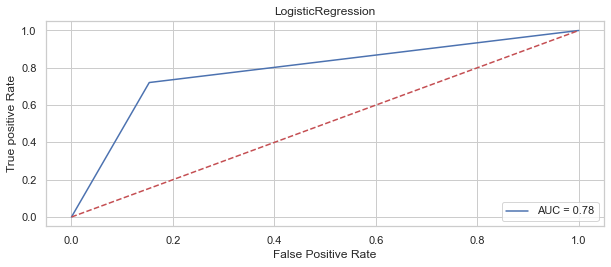

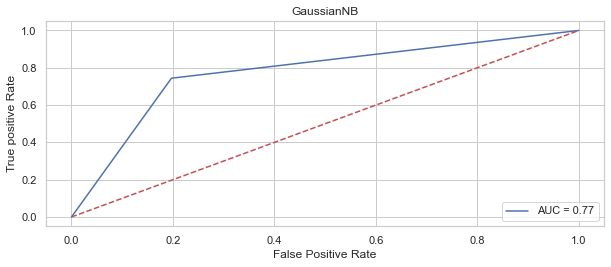

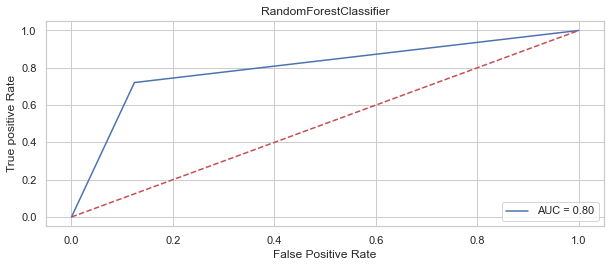

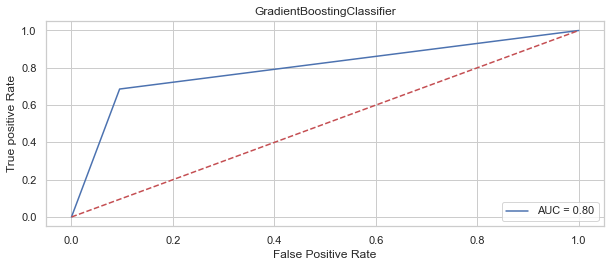

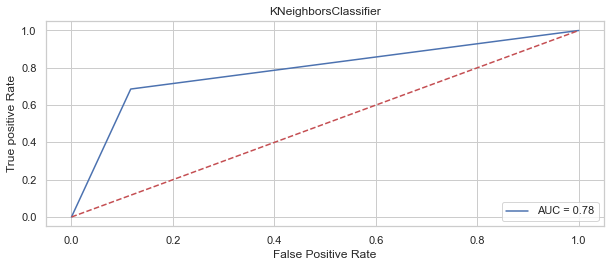

In [65]:
Model=[]
score=[]
CVS=[]
rocscore=[]
for name,model in models:
    print(name)
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score=',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross_Val_Score=',sc)
    CVS.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,threshold=roc_curve(y_test,pre)
    roc_auc= auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score=',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [66]:
result = pd.DataFrame({'Model':Model,'Accuracy_score': score,'cross_val_score':CVS,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,cross_val_score,Roc_auc_curve
0,LogisticRegression,79.820628,79.014981,78.382278
1,GaussianNB,78.026906,77.667915,77.355288
2,RandomForestClassifier,81.614350,80.479401,79.842132
3,GradientBoostingClassifier,82.062780,82.943820,79.557800
4,KNeighborsClassifier,80.717489,82.161049,78.462910


As we can see that Gradient Boosting performns well in this condition

## Hyuperparameter Tuneing using GridSearchCV

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=66,test_size=.20)
gradient=GradientBoostingClassifier()
param={'loss':['deviance','exponential'],'n_estimators':[64,50,100,200],'learning_rate':[.001,.01,.1,1,1.2],'max_depth':[10,50,None],'max_features':[4,5,8]}
glf=GridSearchCV(estimator=gradient,param_grid=param,scoring='accuracy',n_jobs=-1)
glf.fit(x_train,y_train)
glf.best_params_

{'learning_rate': 1.2,
 'loss': 'exponential',
 'max_depth': 10,
 'max_features': 5,
 'n_estimators': 200}

In [68]:
gradient=GradientBoostingClassifier(learning_rate=.01,loss='deviance',max_depth=10,max_features=4,n_estimators=50)
gradient.fit(x_train,y_train)
pred=gradient.predict(x_test)
print('\n')
print('Accuracy Score',accuracy_score(y_test,pred))
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test,pred))
print('\n')
print('Classification Report')
print(classification_report(y_test,pred))
print('\n')
print('Roc_auc Score',roc_auc_score(y_test,pred))




Accuracy Score 0.8603351955307262


Confusion Matrix
[[113   3]
 [ 22  41]]


Classification Report
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       116
           1       0.93      0.65      0.77        63

    accuracy                           0.86       179
   macro avg       0.88      0.81      0.83       179
weighted avg       0.87      0.86      0.85       179



Roc_auc Score 0.8124657909140668


With Grid Search we Increase the accuracy Score

# Saving The Model

In [69]:
import joblib
joblib.dump(gradient,'Titanic_gbc.pkl')

['Titanic_gbc.pkl']